In [3]:
import pandas as pd

import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()



Saving Sales_September_2019.csv to Sales_September_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_April_2019.csv to Sales_April_2019.csv


In [327]:
df = pd.concat(
    map(pd.read_csv, ['Sales_April_2019.csv', 'Sales_August_2019.csv','Sales_December_2019.csv','Sales_February_2019.csv','Sales_January_2019.csv', 'Sales_July_2019.csv','Sales_June_2019.csv','Sales_March_2019.csv','Sales_November_2019.csv','Sales_October_2019.csv','Sales_September_2019.csv']), ignore_index=True)
print(df)

       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1           NaN                         NaN              NaN        NaN   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
170210   259353      AAA Batteries (4-pack)                3       2.99   
170211   259354                      iPhone                1        700   
170212   259355                      iPhone                1        700   
170213   259356      34in Ultrawide Monitor                1     379.99   
170214   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46           

In [328]:
nan_df = df[df.isna().any(axis = 1)]
nan_df.head()

df = df.dropna(how = 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [329]:
df = df[df['Order Date'].str[0:2] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
170210,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
170211,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
170212,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
170213,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [330]:
df['month'] = df['Order Date'].str[0:2] 
df['month'] = df['month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [331]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])


In [332]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [333]:
def get_city(address) :
       return address.split(',')[1]
  
def get_state(address) :
        return address.split(',')[2].split(' ')[1]


df['city'] = df['Purchase Address'].apply(lambda x : get_city(x) + '' + get_state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,DallasTX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,BostonMA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los AngelesCA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los AngelesCA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los AngelesCA


what was best month for sales and how much was earned that month

In [334]:
results = df.groupby('month').sum()

In [335]:
import pandas as pd

import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

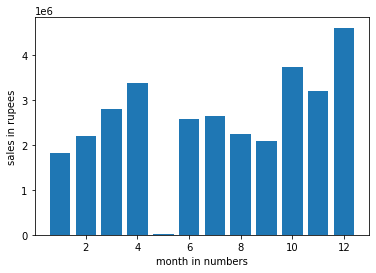

In [336]:
month = range(1,13)
plt.bar(month,results['Sales'])
plt.ylabel('sales in rupees')
plt.xlabel('month in numbers')


plt.show()


which city has high number of sales

In [337]:
results = df.groupby('city').sum()
results


,Quantity Ordered,Price Each,month,Sales
city,,,,
AtlantaGA,15096,2541932.55,98136,2556235.62
AustinTX,10191,1649961.45,65633,1658836.54
BostonMA,20543,3312525.74,132112,3333954.13
DallasTX,15115,2487573.75,97519,2501595.91
Los AngelesCA,30403,4924280.19,195482,4952873.90
New York CityNY,25376,4201638.91,164399,4227899.08
PortlandME,2509,389320.76,16034,391779.51
PortlandOR,10236,1688642.23,65900,1698141.13
San FranciscoCA,45804,7443433.33,295910,7489884.16


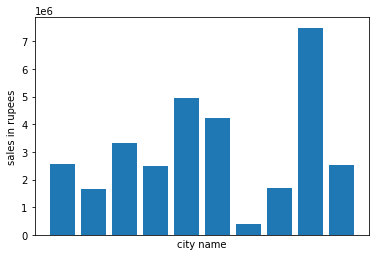

In [338]:
import matplotlib.pyplot as plt
cities = [city for city , df in df.groupby('city')]
plt.bar(cities,results['Sales'])
plt.xticks('cities', rotation = 'vertical', size = 8)
plt.ylabel('sales in rupees')
plt.xlabel('city name')


plt.show()

what time should we display advertisments to maximize lifelihood of customers buying product

In [339]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [340]:
df['Hour'] = df['Order Date'].dt.hour
df['minute'] = df['Order Date'].dt.minute
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,DallasTX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,BostonMA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los AngelesCA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los AngelesCA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los AngelesCA,9,27


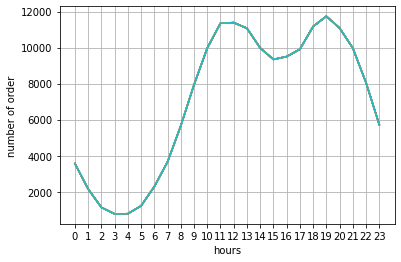

In [341]:
hours = [hour for hour , df in df.groupby('Hour')]
plt.plot(hours,df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('number of order')
plt.grid()
plt.show()

what product sold the most and why it sold the most

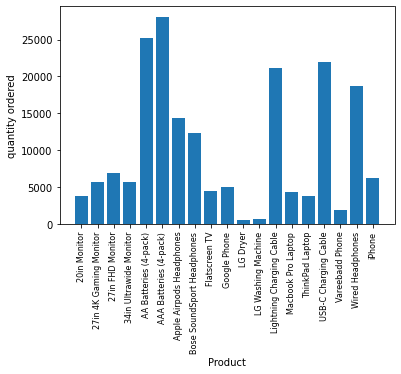

In [351]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product , df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel('quantity ordered')
plt.xlabel('Product')

plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

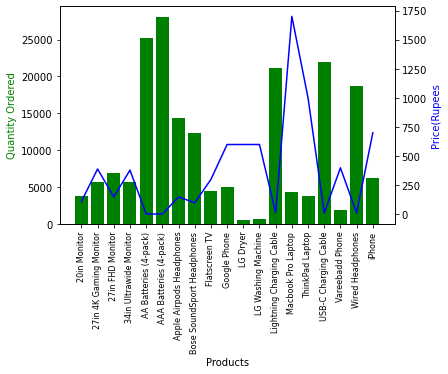

In [359]:
prices = df.groupby('Product').mean()['Price Each']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color = 'g')
ax2.plot(products, prices, color = 'b')
 
# giving labels to the axises

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price(Rupees',color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.show()

what products are mostly sold together

In [323]:
df = df[df['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()


<ipython-input-323-f396929fe64c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [268]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped'] :
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,3)))
  

for key,value in count.most_common(10) :
    print(key,value)


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 76
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 54
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 30
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4


AttributeError: ignored